In [2]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [3]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# NNAntisparse

In [3]:
# df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV1.pkl")

In [4]:
# results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# # results
# table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
# table['rho'] = np.array([0.1*j for j in range(9)])
# for m in list(table.columns[1:]):
#     table[m] = results.loc[results['Model'] == m]['SINR'].values
    
# table

In [5]:
# df_nnanti_results.loc[(df_nnanti_results['Model'] == 'CorInfoMax2') & (df_nnanti_results['rho'] == 0.8)]['SINR'].hist()

In [6]:
# df_nnanti_results.loc[df_nnanti_results['SINR'] == -999]

In [7]:
# df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results

In [8]:
# SetPlotRC()

# # results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
# SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
# SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
# SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
# SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
# SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
# SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
# SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
# rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
# fh2=plt.figure(figsize=(10, 6), dpi=80)

# plt.plot(rholist,SINRCorInfoMax,linewidth=4)
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4)
# plt.plot(rholist,SINRBCA,'r--',linewidth=4)
# plt.plot(rholist,SINRIca,'g--',linewidth=4)
# plt.plot(rholist,SINRNSM,'b--',linewidth=4)
# plt.plot(rholist,SINRLDMI,'k--',linewidth=4)
# plt.plot(rholist,SINRPMF,'o--',linewidth=4)

# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"$\rho$",fontsize=25)
# plt.legend(['CorInfoMax','CorInfoMax2','OnlineBCA','ICA-Infomax', 'NSM','LD-InfoMax', 'PMF'],loc='lower left',fontsize=20)
# plt.axis([0.0,0.8,-0,37])
# plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
# ApplyFont(plt.gca())


In [9]:
df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV2.pkl").iloc[:int(9*7*100)]
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ')
print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# df_nnanti_results.iloc[-20:]

Shape : (6300, 13)
Number of diverge cases for CorInfoMax is : 
0


In [10]:
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,rho,CorInfoMax,CorInfoMax2,OnlineBCA,NSM,ICA,LDMI,PMF
0,0.0,27.244685,27.871744,28.165488,29.542237,23.838138,31.393648,29.839121
1,0.1,27.502785,27.967012,28.172274,23.140114,19.949051,31.372895,29.950132
2,0.2,27.486791,27.884511,27.885992,17.568544,15.730983,31.521691,29.732986
3,0.3,27.322740,27.598665,27.469186,13.714490,12.771990,31.453127,29.592594
4,0.4,27.581375,27.589904,27.522128,10.876288,10.530696,31.975688,30.025220
5,0.5,27.032967,26.826423,26.417667,8.194453,8.563726,31.661239,29.497131
6,0.6,26.492704,25.991164,25.302152,5.700218,6.825230,31.538139,29.453701
7,0.7,25.205596,23.914650,22.651065,4.359822,3.698915,31.455187,29.206181
8,0.8,20.803054,19.144516,17.670144,2.959925,3.995689,30.189740,28.046089


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


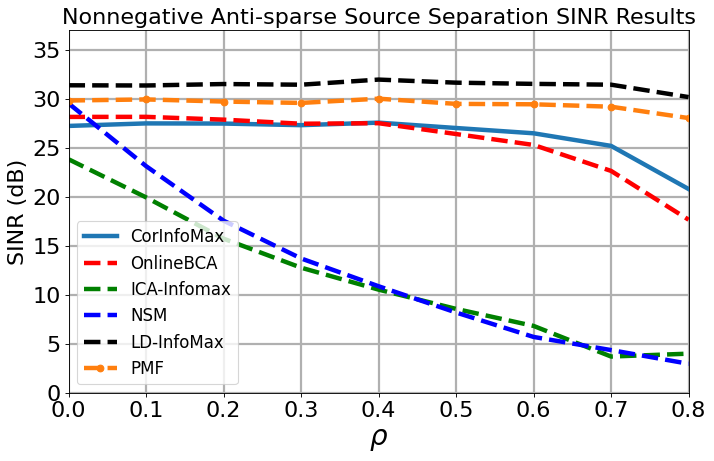

In [11]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxNNAntisparse_Correlated.pdf', format='pdf')

In [12]:
results.loc[results['Model'] == 'CorInfoMax']

,Model,rho,count,SINR
0,CorInfoMax,0.0,100,27.244685
1,CorInfoMax,0.1,100,27.502785
2,CorInfoMax,0.2,100,27.486791
3,CorInfoMax,0.3,100,27.322740
4,CorInfoMax,0.4,100,27.581375
5,CorInfoMax,0.5,100,27.032967
6,CorInfoMax,0.6,100,26.492704
7,CorInfoMax,0.7,100,25.205596
8,CorInfoMax,0.8,100,20.803054


In [236]:
df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV3.pkl")#.iloc[:int(9*7*100)]
print('Shape : {}'.format(df_nnanti_results.shape))
# print('Number of diverge cases for CorInfoMax is : ')
# print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
# df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
df_nnanti_results.loc[df_nnanti_results['Model'] == 'WSM']

Shape : (464, 13)


,rho,trial,seed,Model,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time
3,0.0,0,37413175,WSM,21.184216,"[8.079985694895012, 16.561104157828904, 16.495...","[22.435267628675067, 19.873835091428955, 25.97...",None,None,None,"[[0.21536273453287041, 0.21197478353282376, -0...",None,145.347028
11,0.1,0,37413175,WSM,24.453604,"[10.784133369063174, 23.11654188023143, 23.988...","[21.834080799770398, 25.218983695956595, 27.68...",None,None,None,"[[-0.6996787181825452, 0.15980520360060121, -0...",None,180.162735
19,0.2,0,37413175,WSM,21.927512,"[4.942470954546955, 17.92634358128008, 17.9471...","[23.416833895073825, 20.86083878817512, 27.101...",None,None,None,"[[-0.25364037905913983, 0.7225241676698899, -0...",None,214.599431
27,0.3,0,37413175,WSM,16.746578,"[7.858828142818812, 18.436448198014787, 18.294...","[14.142422407888217, 18.346175656381366, 15.39...",None,None,None,"[[-0.4071116613803239, -0.4176801574526495, 0....",None,318.250452
35,0.4,0,37413175,WSM,20.104053,"[11.413818826573241, 19.35172257499907, 20.472...","[28.708374365957333, 25.679914567949425, 15.04...",None,None,None,"[[0.14549003566050878, -0.34112019784916064, 0...",None,188.945782
43,0.5,0,37413175,WSM,16.978687,"[5.52371486332209, 12.228609525693399, 15.2937...","[17.93620577257046, 24.92393042396821, 15.0471...",None,None,None,"[[-0.11405554056468654, -0.052497320449774204,...",None,344.306215
51,0.6,0,37413175,WSM,19.706582,"[9.567499438304948, 19.1497034516902, 19.67247...","[18.15528146114533, 19.040109111616637, 24.492...",None,None,None,"[[0.3841356117194153, -0.2079606373189966, 0.0...",None,259.052454
59,0.7,0,37413175,WSM,15.018364,"[15.106447932308312, 14.668009074241581, 14.05...","[16.27837925643897, 16.280732591165233, 19.485...",None,None,None,"[[0.21608289500462974, 0.1501015372352753, -0....",None,231.061663
67,0.8,0,37413175,WSM,15.006045,"[13.667179047829823, 15.356307224940576, 15.20...","[15.718083669579952, 12.580535423161304, 15.10...",None,None,None,"[[0.075677339597227, -0.07789571580965463, 1.2...",None,323.477676
75,0.0,1,38909702,WSM,25.287012,"[4.3232581852020635, 18.231225452357418, 19.88...","[29.042325204881408, 28.824088027840553, 24.66...",None,None,None,"[[0.07009273593070794, -0.10261484915668105, 0...",None,122.782289


In [237]:
df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV4.pkl")#.iloc[:int(9*7*100)]
print('Shape : {}'.format(df_nnanti_results.shape))
# print('Number of diverge cases for CorInfoMax is : ')
# print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
# df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
df_nnanti_results.loc[df_nnanti_results['Model'] == 'WSM']

Shape : (464, 13)


,rho,trial,seed,Model,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time
3,0.0,0,18853475,WSM,24.541180,"[6.959503120787071, 23.21228110106414, 24.0298...","[29.330398405444562, 27.400780448873363, 20.03...",None,None,None,"[[0.25931131824950576, 0.21998326306524385, -0...",None,119.288999
11,0.1,0,18853475,WSM,22.538572,"[8.478292092574401, 21.71599811363327, 24.7978...","[17.251296272139648, 24.497231286617755, 26.48...",None,None,None,"[[-0.393859341960871, 0.09693131169355478, 0.0...",None,162.822559
19,0.2,0,18853475,WSM,31.388848,"[4.452197294707167, 22.863704134376416, 23.358...","[29.79600899719418, 28.46373847438103, 31.8877...",None,None,None,"[[0.13802755212472065, -0.18123587686403808, 0...",None,105.432190
27,0.3,0,18853475,WSM,21.669218,"[7.3340091670154814, 20.15910606953179, 20.994...","[27.087600874470873, 31.46606382063515, 15.682...",None,None,None,"[[0.23451301304202665, 0.10629087858226305, 0....",None,186.489221
35,0.4,0,18853475,WSM,24.205689,"[9.296455275147997, 18.988486177846312, 19.251...","[27.766109397333658, 21.833219690928676, 27.21...",None,None,None,"[[-0.33179708251043527, 0.22975766317477625, 0...",None,181.579318
43,0.5,0,18853475,WSM,20.843422,"[1.359536017199848, 19.072307869587625, 19.576...","[22.498397013568216, 28.644541067754087, 16.07...",None,None,None,"[[0.11144081138099883, -0.39871945565373185, -...",None,361.668017
51,0.6,0,18853475,WSM,23.379456,"[9.596295866340883, 21.778899224422265, 22.590...","[27.114098141310095, 26.266468703817296, 18.19...",None,None,None,"[[-0.05199996972625769, -0.09752455456400692, ...",None,197.868584
59,0.7,0,18853475,WSM,23.841654,"[12.029959543032287, 18.382718555975487, 17.77...","[22.143097057946566, 22.605110762034816, 25.05...",None,None,None,"[[0.05593692931383847, 0.07138609328670699, 0....",None,193.625638
67,0.8,0,18853475,WSM,18.870445,"[9.650489302429202, 16.159245301747372, 16.159...","[25.922770459843974, 18.412334082844534, 18.06...",None,None,None,"[[-0.24945182339093977, -0.5193305960537997, -...",None,318.601645
75,0.0,1,19607614,WSM,15.507925,"[5.243318714063413, 14.93110906749396, 15.5670...","[26.056543445360937, 22.572669550249618, 10.41...",None,None,None,"[[-0.11809185265267133, 0.5220037047257546, -0...",None,278.367329


In [238]:
df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV5.pkl")#.iloc[:int(9*7*100)]
print('Shape : {}'.format(df_nnanti_results.shape))
# print('Number of diverge cases for CorInfoMax is : ')
# print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
# df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
df_nnanti_results.loc[df_nnanti_results['Model'] == 'WSM']

Shape : (472, 13)


,rho,trial,seed,Model,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time
3,0.0,0,18596250,WSM,20.724732,"[9.54978170122274, 12.514303539876948, 12.6813...","[29.877549922463864, 28.508831568101645, 29.16...",None,None,None,"[[0.3267567971389769, 0.0008314179921763806, 0...",None,162.335506
11,0.1,0,18596250,WSM,24.838737,"[6.79316416920173, 19.87891479733548, 21.39995...","[26.460213676316123, 29.05551262275671, 25.038...",None,None,None,"[[0.1721347972318188, -0.022588582384690924, -...",None,176.416631
19,0.2,0,18596250,WSM,23.928142,"[6.93950863599743, 23.493896277298113, 24.0027...","[22.15627314366051, 28.681881569184515, 19.629...",None,None,None,"[[-0.1074167715335598, 0.016341678791106016, 0...",None,133.211044
27,0.3,0,18596250,WSM,28.659908,"[6.779805371446211, 23.731501004790857, 24.460...","[27.396162053751027, 29.333401196546337, 26.14...",None,None,None,"[[0.011647340959835138, -0.1199031367273839, 0...",None,135.580509
35,0.4,0,18596250,WSM,29.319753,"[6.208899040362773, 19.365409288429674, 21.915...","[29.23190634614084, 26.54409663698296, 30.5149...",None,None,None,"[[0.2752274378681141, -0.47020472362734583, 0....",None,128.452385
43,0.5,0,18596250,WSM,16.986029,"[8.425967726695996, 11.693680246303188, 13.326...","[9.627441073058238, 23.848590956261205, 25.521...",None,None,None,"[[0.008437068296936225, 0.05516393591010734, -...",None,288.716819
51,0.6,0,18596250,WSM,26.724907,"[12.237543693266124, 21.05802821504195, 23.361...","[26.873945647349544, 25.145998136935866, 24.67...",None,None,None,"[[0.14491094181934217, 0.34003200107750436, -0...",None,213.095977
59,0.7,0,18596250,WSM,14.157056,"[11.414292500054568, 14.874612563461753, 14.92...","[19.436827835251155, 12.922682561009715, 10.29...",None,None,None,"[[-0.16682934056154064, -0.1739796989943741, 0...",None,273.679018
67,0.8,0,18596250,WSM,20.340817,"[10.81985935132294, 18.45821770923901, 18.9812...","[17.323876486905498, 20.92261686699392, 20.351...",None,None,None,"[[0.0023104365510001074, 0.1813691448757398, 0...",None,243.054122
75,0.0,1,19340100,WSM,23.356476,"[5.851466208953164, 17.111113780795616, 18.889...","[21.854941435179633, 21.15158723800493, 24.390...",None,None,None,"[[-0.6574199245544567, -0.12869039951509315, -...",None,181.092091


In [6]:
df_nnanti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV3.pkl")
df_nnanti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV4.pkl")
df_nnanti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV5.pkl")
df_nnanti_results = pd.concat([df_nnanti_results1,df_nnanti_results2, df_nnanti_results3], axis = 0)
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'WSM')].shape[0])

df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (7344, 13)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  4


,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,NSM,ICA,LDMI,PMF
0,0.0,27.292599,27.908475,28.210562,22.938262,29.588839,23.916793,31.302499,29.901285
1,0.1,27.246027,27.806411,27.883888,23.040980,22.977941,19.759046,31.336774,29.637345
2,0.2,27.520681,27.835281,27.991913,23.893955,17.586465,15.746265,31.654276,29.914843
3,0.3,27.558599,27.625451,27.604565,22.373463,13.794239,12.786626,31.557531,29.807568
4,0.4,27.497256,27.448209,27.256105,22.918287,10.895899,10.496775,31.773580,29.773947
5,0.5,27.340251,27.154229,26.606718,22.978679,8.299395,8.579072,31.844500,29.706220
6,0.6,26.737031,26.070418,25.162674,21.815392,5.976326,6.814227,31.624055,29.178485
7,0.7,24.450330,22.563544,21.686779,19.629812,4.099794,3.641076,30.987100,28.801331
8,0.8,21.383714,19.991633,18.245082,18.383201,2.966047,4.009013,30.427482,28.345202


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


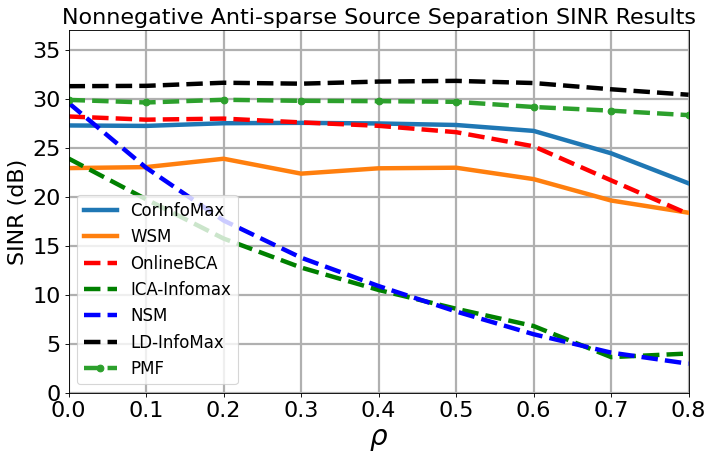

In [7]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()

rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())


In [5]:
results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
63,WSM,0.0,98,22.934901
64,WSM,0.1,100,23.012359
65,WSM,0.2,100,23.823600
66,WSM,0.3,99,22.427713
67,WSM,0.4,99,22.776846
68,WSM,0.5,98,23.012552
69,WSM,0.6,98,21.907847
70,WSM,0.7,98,19.667312
71,WSM,0.8,98,18.354249


In [249]:
# df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV6.pkl")#.iloc[:int(9*7*100)]
# print('Shape : {}'.format(df_nnanti_results.shape))
# # print('Number of diverge cases for CorInfoMax is : ')
# # print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
# # df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# df_nnanti_results.loc[df_nnanti_results['Model'] == 'WSM']

Shape : (24, 13)


,rho,trial,seed,Model,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time
3,0.0,0,18596275,WSM,23.637814,"[1.8635431868774264, 16.380310868943305, 16.71...","[20.979408133016367, 23.522425774260114, 21.70...",None,None,None,"[[-0.18482299752365158, -0.02419005939359768, ...",None,320.219499
11,0.1,0,18596275,WSM,22.544507,"[9.506123780482254, 18.44480847933615, 20.1692...","[23.45994242376298, 31.25235085147342, 27.3382...",None,None,None,"[[0.035838176746818155, 0.0022868927481639514,...",None,209.591755
19,0.2,0,18596275,WSM,23.460815,"[5.810812160881017, 23.153300232537344, 23.499...","[24.57430796501518, 23.001988494120077, 23.682...",None,None,None,"[[-0.7315305408774869, 0.12075008219126744, 0....",None,247.918974


In [250]:
# df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV7.pkl")#.iloc[:int(9*7*100)]
# print('Shape : {}'.format(df_nnanti_results.shape))
# # print('Number of diverge cases for CorInfoMax is : ')
# # print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
# # df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# df_nnanti_results.loc[df_nnanti_results['Model'] == 'WSM']

Shape : (24, 13)


,rho,trial,seed,Model,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time
3,0.0,0,1859735275,WSM,21.301888,"[7.251113369029078, 19.46160808821129, 21.1691...","[26.6963308002938, 20.213525610256532, 23.2881...",None,None,None,"[[-0.1953851074935004, 0.0299691531821474, -0....",None,251.309594
11,0.1,0,1859735275,WSM,18.949756,"[9.446549494369709, 16.191730433148923, 17.487...","[17.18001210669458, 28.567845161903513, 23.877...",None,None,None,"[[0.048625919041049334, -0.228266273801837, -0...",None,202.980590
19,0.2,0,1859735275,WSM,22.103109,"[6.407055945700102, 13.188592860777835, 15.166...","[20.232064429736546, 24.64119104292344, 27.143...",None,None,None,"[[-0.29788344454575816, 0.1676373922001713, -0...",None,341.200521


In [248]:
# df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV8.pkl")#.iloc[:int(9*7*100)]
# print('Shape : {}'.format(df_nnanti_results.shape))
# # print('Number of diverge cases for CorInfoMax is : ')
# # print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
# # df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# df_nnanti_results.loc[df_nnanti_results['Model'] == 'WSM']

Shape : (16, 13)


,rho,trial,seed,Model,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time
3,0.0,0,2525,WSM,20.833655,"[3.1079279006501443, 17.187183467393844, 18.42...","[31.255414722795216, 26.13359595769285, 27.288...",None,None,None,"[[-0.33049136312797883, 0.3460970572446312, 0....",None,229.580305
11,0.1,0,2525,WSM,22.404034,"[10.116799551055484, 17.59500621854589, 17.868...","[25.087156228392793, 24.756739097403635, 17.84...",None,None,None,"[[0.2157077617893941, 0.2895348754654156, 0.02...",None,306.930470


In [3]:
df_nnanti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV6.pkl")
df_nnanti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV7.pkl")
df_nnanti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV8.pkl")
df_nnanti_results = pd.concat([df_nnanti_results1,df_nnanti_results2, df_nnanti_results3], axis = 0)
# df_nnanti_results = pd.concat([df_nnanti_results1,df_nnanti_results2], axis = 0)
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'WSM')].shape[0])

df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (7272, 13)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  1


,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,NSM,ICA,LDMI,PMF
0,0.0,27.237386,27.888263,28.219358,24.088838,29.646316,23.920675,31.457875,29.910190
1,0.1,27.455646,27.993481,28.224780,23.841594,23.091752,19.932267,31.442456,29.936664
2,0.2,27.589513,27.943542,28.047207,24.084812,17.512705,15.761150,31.586103,29.890356
3,0.3,27.728737,27.922730,27.891794,24.105861,13.709542,12.822881,31.868820,30.002678
4,0.4,27.567777,27.433168,27.137081,23.552901,10.777046,10.500545,31.894656,29.765179
5,0.5,27.311022,27.182752,26.499832,23.151195,8.197990,8.577463,32.120565,29.717283
6,0.6,25.748190,25.424942,24.719953,21.942927,5.600301,6.819044,31.571185,29.210100
7,0.7,25.327150,24.174305,23.202219,20.097983,4.038107,3.680665,31.202979,29.036612
8,0.8,21.438772,19.004636,18.093436,18.646783,2.953141,4.000511,30.129976,28.149105


In [ ]:
# df_nnanti_results = pd.concat([df_nnanti_results3], axis = 0)
# print('Shape : {}'.format(df_nnanti_results.shape))
# print('Number of diverge cases for CorInfoMax is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
# print('Number of diverge cases for WSM is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'WSM')].shape[0])

# df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
# table['rho'] = np.array([0.1*j for j in range(9)])
# for m in list(table.columns[1:]):
#     table[m] = results.loc[results['Model'] == m]['SINR'].values
    
# table

In [ ]:
# df_nnanti_results.loc[(df_nnanti_results['rho'] == 0.2) & (df_nnanti_results['Model'] == "WSM")]['SINR'].hist()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


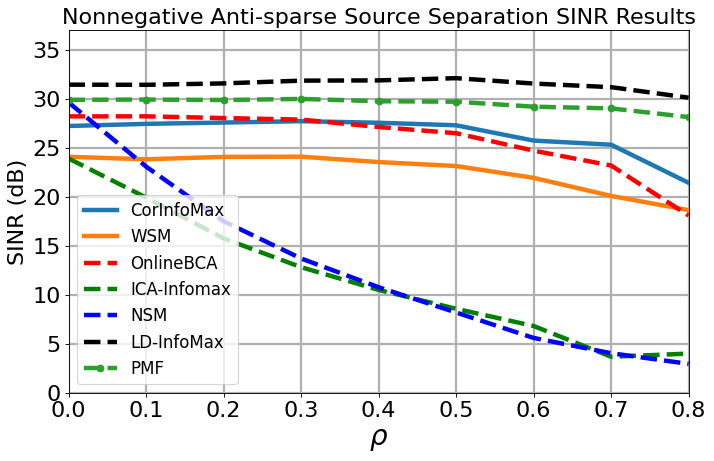

In [4]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()

rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())


In [5]:
results.loc[results['Model'] == 'WSM']

,Model,rho,count,SINR
63,WSM,0.0,101,24.088838
64,WSM,0.1,101,23.841594
65,WSM,0.2,100,24.084812
66,WSM,0.3,101,24.105861
67,WSM,0.4,101,23.552901
68,WSM,0.5,101,23.151195
69,WSM,0.6,101,21.942927
70,WSM,0.7,101,20.097983
71,WSM,0.8,101,18.646783


In [ ]:
from general_utils import *
from visualization_utils import *
from polytope_utils import *
from bss_utils import *

30.665558333937454


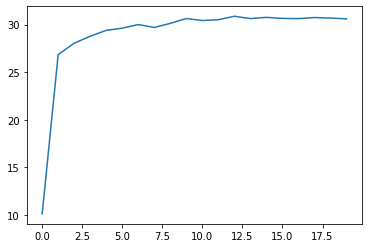

In [147]:
rho = 0.0
k = 0
print(df_nnanti_results.loc[(df_nnanti_results['Model'] == 'WSM') & (df_nnanti_results['rho'] == rho)].iloc[k]['SINR'])
plt.plot(df_nnanti_results.loc[(df_nnanti_results['Model'] == 'WSM') & (df_nnanti_results['rho'] == rho)].iloc[k]['SINRlist'])

In [109]:
rho = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'WSM') & (df_nnanti_results['rho'] == rho)].iloc[k]['rho']
trial = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'WSM') & (df_nnanti_results['rho'] == rho)].iloc[k]['trial']
seed = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'WSM') & (df_nnanti_results['rho'] == rho)].iloc[k]['seed']
Wf = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'WSM') & (df_nnanti_results['rho'] == rho)].iloc[k]['Wf']

In [110]:
A = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'CorInfoMax') & (df_nnanti_results['seed'] == seed) & (df_nnanti_results['rho'] == rho)].iloc[0]['A']
S = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'CorInfoMax') & (df_nnanti_results['seed'] == seed) & (df_nnanti_results['rho'] == rho)].iloc[0]['S']
Xnoisy = df_nnanti_results.loc[(df_nnanti_results['Model'] == 'CorInfoMax') & (df_nnanti_results['seed'] == seed) & (df_nnanti_results['rho'] == rho)].iloc[0]['X']
X_WSM = (0.28 * (Xnoisy / Xnoisy.std(1)[:,np.newaxis]))
np.linalg.norm(X - A @ S)

3588.2328337473987

In [112]:
Y = Wf @ X_WSM
Y_ = signed_and_permutation_corrected_sourcesV2(S, Y)
SINR, SNR, _, _, _ = evaluate_bssV2(Wf, Y_, A, S, mean_normalize_estimations = False)
SINR

16.444212176591503

In [113]:
find_permutation_between_source_and_estimationV2(S, Y)

array([0, 2, 1, 4, 3])

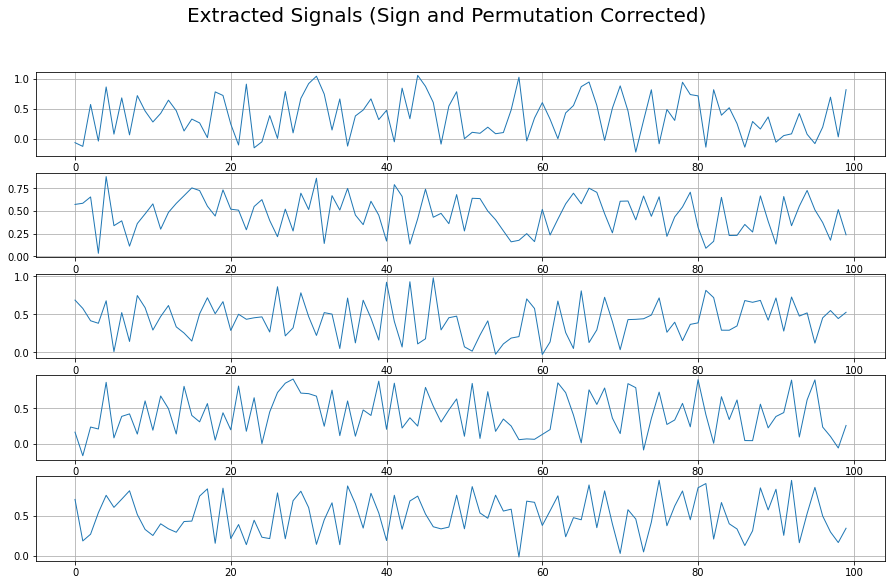

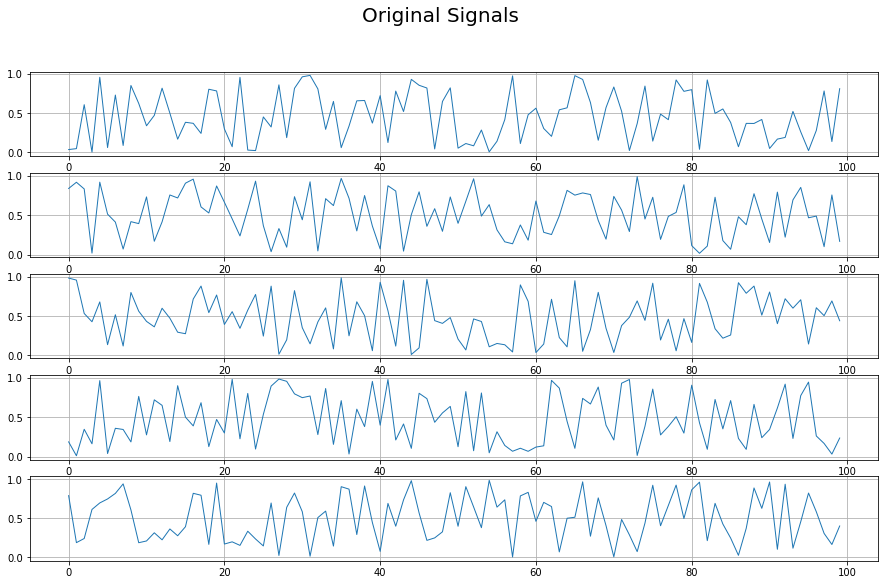

In [114]:

subplot_1D_signals(
    Y_[:, 0:100],
    title="Extracted Signals (Sign and Permutation Corrected)",
    figsize=(15.2, 9),
    colorcode=None,
)
subplot_1D_signals(
    S[:, 0:100], title="Original Signals", figsize=(15.2, 9), colorcode=None
)

In [30]:
df_nnanti_results.loc[(df_nnanti_results['Model'] == 'CorInfoMax') & (df_nnanti_results['seed'] == seed) & (df_nnanti_results['rho'] == rho)].iloc[0]['X']

array([[-0.00979196, -0.47322191,  0.10147285, ...,  0.07018086,
        -0.03680651, -0.1854168 ],
       [ 0.54583904,  2.24018096,  0.35544836, ...,  0.57115975,
         0.02581989,  2.31717363],
       [-0.83745698,  0.52986438, -0.22952663, ...,  0.05328756,
        -0.02862479,  0.15601713],
       ...,
       [-0.788029  , -1.27004859, -0.35505713, ..., -0.78617496,
        -0.02607228, -1.67200921],
       [ 0.69969   ,  2.46280904,  0.40353195, ...,  0.89271367,
         0.10429501,  2.88401893],
       [ 0.75343198,  0.59441378,  0.22508022, ...,  0.43538046,
         0.02066365,  0.76128468]])

# Antisparse

In [13]:
# df_anti_results = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV1.pkl")

In [14]:
# df_anti_results

In [15]:
# results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# # results.loc[results['Model'] == 'CorInfoMax2']

# table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
# table['rho'] = np.array([0.1*j for j in range(9)])
# for m in list(table.columns[1:]):
#     table[m] = results.loc[results['Model'] == m]['SINR'].values
    
# table

In [16]:
# df_anti_results.loc[df_anti_results['SINR'] == -999]

In [17]:
# results.loc[results['Model'] == 'OnlineBCA']

In [18]:
# results = df_anti_results.loc[df_anti_results['SINR'] != -999][['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results.loc[results['Model'] == 'CorInfoMax2']

In [19]:
# SetPlotRC()

# # results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
# SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
# SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
# SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
# SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
# SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
# SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
# SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
# rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
# fh2=plt.figure(figsize=(10, 6), dpi=80)

# plt.plot(rholist,SINRCorInfoMax,linewidth=4)
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4)
# plt.plot(rholist,SINRBCA,'r--',linewidth=4)
# plt.plot(rholist,SINRIca,'g--',linewidth=4)
# plt.plot(rholist,SINRBSM,'b--',linewidth=4)
# plt.plot(rholist,SINRLDMI,'k--',linewidth=4)
# plt.plot(rholist,SINRPMF,'o--',linewidth=4)
# gh=plt.grid(linewidth=2)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"$\rho$",fontsize=25)
# plt.legend(['CorInfoMax','CorInfoMax2','OnlineBCA','ICA-Infomax', 'BSM','LD-InfoMax', 'PMF'],loc='lower left',fontsize=20)
# plt.axis([0.0,0.8,-0,37])
# plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
# ApplyFont(plt.gca())


In [20]:
df_anti_results = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV2.pkl").iloc[:int(9*7*100)]
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ')
print(df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
df_anti_results = df_anti_results.loc[(df_anti_results['SINR'] != -999)]

Shape : (6300, 13)
Number of diverge cases for CorInfoMax is : 
0


In [21]:
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results.loc[results['Model'] == 'CorInfoMax2']

table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,rho,CorInfoMax,CorInfoMax2,OnlineBCA,BSM,ICA,LDMI,PMF
0,0.0,24.709056,24.044864,25.668309,25.370583,29.643275,29.479405,29.510854
1,0.1,24.781422,24.103222,25.551283,18.724845,21.523834,29.651073,29.549875
2,0.2,24.697136,23.927696,25.141833,13.685154,16.348270,28.798253,29.262811
3,0.3,24.170905,23.167890,24.405175,10.353487,13.109831,28.259328,28.794440
4,0.4,23.632991,22.761455,23.601887,7.914876,10.715336,28.257939,28.614109
5,0.5,23.257116,22.877828,23.026719,5.811517,8.729421,25.787159,28.206243
6,0.6,23.285941,22.703955,22.392018,3.957891,6.961358,23.832697,28.014322
7,0.7,22.323396,22.204172,21.017993,2.164253,3.564699,16.810293,26.995702
8,0.8,21.421071,21.469299,19.603393,0.253840,4.015459,9.736812,25.576452


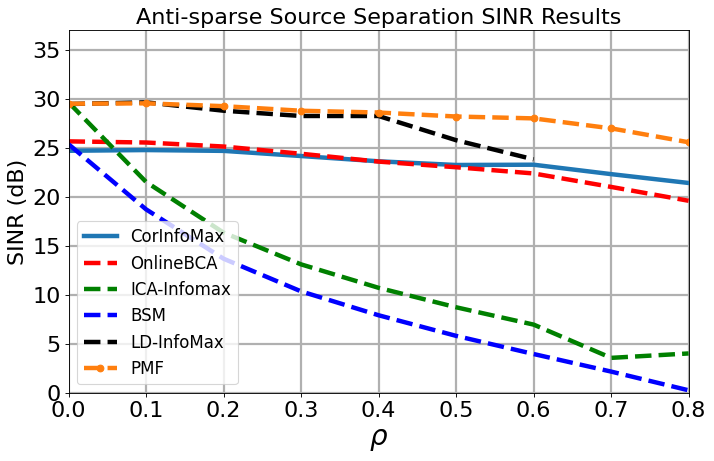

In [22]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
plt.plot(rholist[:7],SINRLDMI[:7],'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxAntisparse_Correlated.pdf', format='pdf')

In [23]:
results.loc[results['Model'] == "LDMI"]

,Model,rho,count,SINR
36,LDMI,0.0,100,29.479405
37,LDMI,0.1,100,29.651073
38,LDMI,0.2,100,28.798253
39,LDMI,0.3,100,28.259328
40,LDMI,0.4,100,28.257939
41,LDMI,0.5,100,25.787159
42,LDMI,0.6,100,23.832697
43,LDMI,0.7,100,16.810293
44,LDMI,0.8,100,9.736812


In [6]:
df_anti_results = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV3.pkl").iloc[:int(9*7*100)]
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ',df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ',df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'WSM')].shape[0])
df_anti_results = df_anti_results.loc[(df_anti_results['SINR'] != -999)]

Shape : (2080, 13)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  0


In [7]:
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results.loc[results['Model'] == 'CorInfoMax2']

table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,BSM,ICA,LDMI,PMF
0,0.0,25.511681,24.498632,26.576755,26.230252,25.703171,29.592130,29.953921,29.509401
1,0.1,25.582975,24.323008,26.358453,27.275239,21.835132,24.251950,28.755162,29.296805
2,0.2,25.770082,24.834496,26.413802,28.364778,16.995914,19.491090,30.414021,29.769772
3,0.3,25.403302,24.424885,26.379399,25.070638,13.615356,16.026502,29.852969,29.371625
4,0.4,25.153285,24.218473,25.649902,25.275518,10.821083,13.404684,29.407351,29.090104
5,0.5,24.515725,23.373396,24.936282,21.979985,8.657658,11.213581,28.578361,29.048936
6,0.6,24.384637,23.210120,24.100415,20.183046,6.583849,9.239845,23.757722,28.485061
7,0.7,23.182711,22.691846,22.205604,18.490300,4.587798,7.322953,21.439691,27.433118
8,0.8,22.791856,21.386632,21.099184,16.679616,2.532839,5.306298,14.032132,26.765671


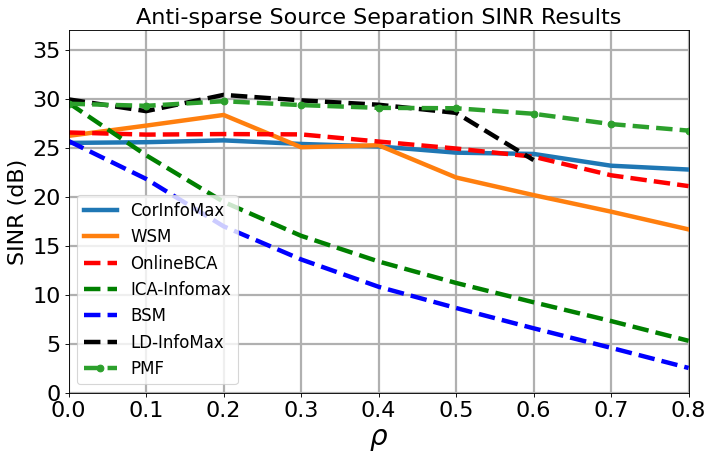

In [8]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
plt.plot(rholist[:7],SINRLDMI[:7],'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())


In [9]:
results

,Model,rho,count,SINR
0,BSM,0.0,29,25.703171
1,BSM,0.1,29,21.835132
2,BSM,0.2,29,16.995914
3,BSM,0.3,29,13.615356
4,BSM,0.4,29,10.821083
...,...,...,...,...
67,WSM,0.4,29,25.275518
68,WSM,0.5,29,21.979985
69,WSM,0.6,29,20.183046
70,WSM,0.7,29,18.490300
